In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam


In [8]:
import scipy.io
mat = scipy.io.loadmat('PowerValuesOctMay.mat')
m = mat['MeasurementsTotal']

In [9]:
m = np.squeeze(m)

In [12]:
df = pd.DataFrame(m)

In [16]:
train = df.iloc[:5000]
test  = df.iloc[5000:]

In [19]:
print(len(train))
print(len(test))

5000
736


<Figure size 720x432 with 0 Axes>

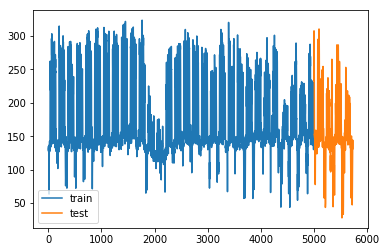

In [20]:
plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [21]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [33]:
x_train = train_sc[:-1]
y_train = train_sc[1:]


x_test = test_sc[:-1]
y_test = test_sc[1:]


In [27]:
x_train

array([[-0.38702426],
       [-0.34855644],
       [-0.37548272],
       ...,
       [-0.38307798],
       [-0.34505593],
       [-0.30556831]])

In [26]:
y_train

array([[-0.34855644],
       [-0.37548272],
       [-0.38997132],
       ...,
       [-0.34505593],
       [-0.30556831],
       [-0.06329878]])

In [28]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
4999/4999 [==============================] - 5s 1ms/step - loss: 0.0260
Epoch 2/100
4999/4999 [==============================] - 5s 996us/step - loss: 0.0174
Epoch 3/100
4999/4999 [==============================] - 5s 1ms/step - loss: 0.0173
Epoch 4/100
4999/4999 [==============================] - 6s 1ms/step - loss: 0.0173
Epoch 5/100
4999/4999 [==============================] - 7s 1ms/step - loss: 0.0172
Epoch 6/100
4999/4999 [==============================] - 6s 1ms/step - loss: 0.0172A: 0s - loss
Epoch 7/100
4999/4999 [==============================] - 6s 1ms/step - loss: 0.0172
Epoch 8/100
4999/4999 [==============================] - 5s 1ms/step - loss: 0.0172
Epoch 9/100
4999/4999 [==============================] - 4s 881us/step - loss: 0.0172
Epoch 10/100
4999/4999 [==============================] - 5s 934us/step - loss: 0.0172
Epoch 11/100
4999/499

In [35]:
y_pred_test_nn = nn_model.predict(x_test)

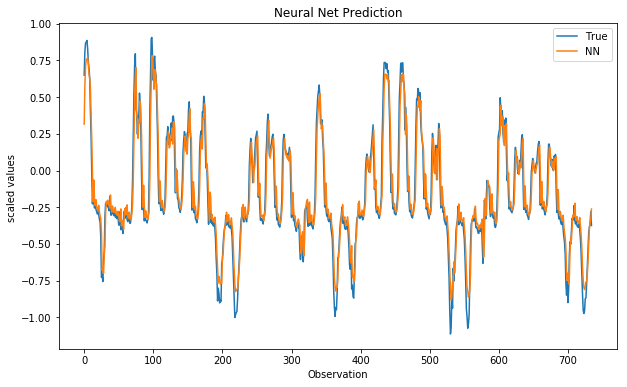

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("Neural Net Prediction")
plt.xlabel('Observation')
plt.ylabel('scaled values ')
plt.legend()
plt.show();